In [0]:
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
df=pd.read_csv("/Volumes/workspace/default/dataset/Nifty_final_df.csv")

In [0]:
df.dropna(subset=['Open', 'High', 'Low', 'Close'], inplace=True)

In [0]:
# Convert 'Date' to datetime objects for proper plotting
df['Date'] = pd.to_datetime(df['Date'])


In [0]:
df.sort_values(by='Date', inplace=True)
df['Daily Return'] = df['Close'].pct_change()
df.dropna(subset=['Daily Return'], inplace=True) # Drop the first NaN value from pct_change

# Add a 'Month' column for the heatmap
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

 Dashboard 1: Market Trend Overview 

Compound Annual Growth Rate (2006–2025): 11.23%
Best Year Return: 82.72%
Worst Year Return: -53.69%


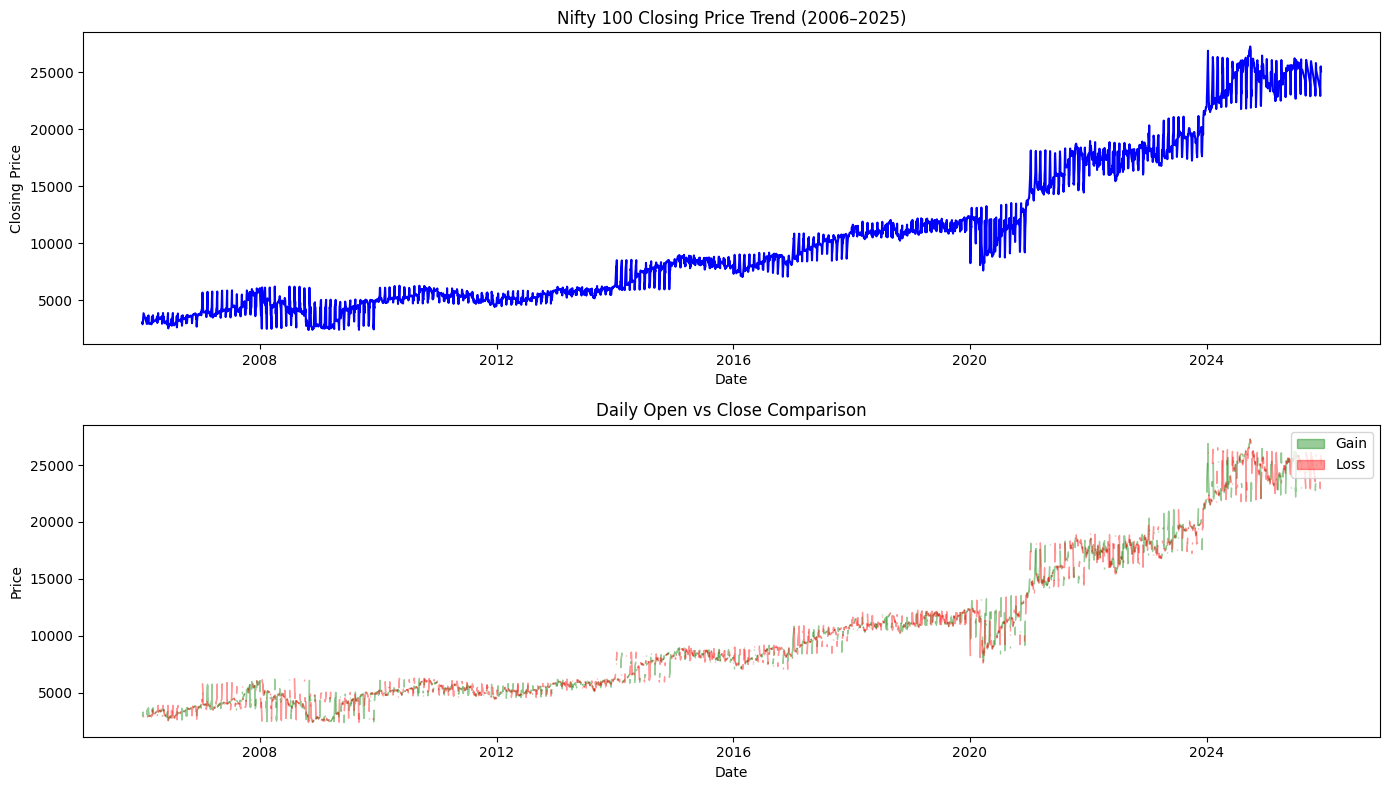

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert Date to datetime
df['Date'] = pd.to_datetime(df['Date'])

# CAGR Calculation
start_price = df.loc[df['Date'].idxmin(), 'Open']
end_price = df.loc[df['Date'].idxmax(), 'Close']
total_years = (df['Date'].max() - df['Date'].min()).days / 365.25
cagr = ((end_price / start_price) ** (1 / total_years)) - 1
print(f"Compound Annual Growth Rate (2006–2025): {cagr:.2%}")

# Yearly Returns
yearly_returns = df.groupby('Year')['Close'].last().pct_change().dropna()
best_year_return = yearly_returns.max()
worst_year_return = yearly_returns.min()
print(f"Best Year Return: {best_year_return:.2%}")
print(f"Worst Year Return: {worst_year_return:.2%}")

# -------- Dashboard 1 --------
plt.figure(figsize=(14,8))

# Subplot 1: Closing Price Trend
plt.subplot(2,1,1)
plt.plot(df['Date'], df['Close'], color='blue', linewidth=1.5)
plt.title('Nifty 100 Closing Price Trend (2006–2025)')
plt.xlabel('Date')
plt.ylabel('Closing Price')

# Subplot 2: Open vs Close (Gain/Loss coloring)
gains = df['Close'] >= df['Open']
plt.subplot(2,1,2)
plt.fill_between(df['Date'], df['Open'], df['Close'], where=gains, color='green', alpha=0.4, label="Gain")
plt.fill_between(df['Date'], df['Open'], df['Close'], where=~gains, color='red', alpha=0.4, label="Loss")
plt.title('Daily Open vs Close Comparison')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

plt.tight_layout()
plt.show()


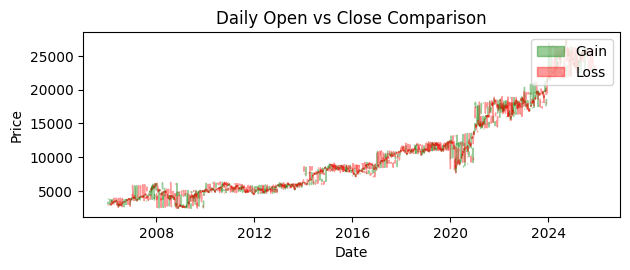

In [0]:
# Subplot 2: Open vs Close (Gain/Loss coloring)
gains = df['Close'] >= df['Open']
plt.subplot(2,1,2)
plt.fill_between(df['Date'], df['Open'], df['Close'], where=gains, color='green', alpha=0.4, label="Gain")
plt.fill_between(df['Date'], df['Open'], df['Close'], where=~gains, color='red', alpha=0.4, label="Loss")
plt.title('Daily Open vs Close Comparison')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

plt.tight_layout()
plt.show()

Dashboard 2: Yearly / Monthly Insights


Average Yearly High-Low Range (Volatility):
Year
2006     60.328821
2007     85.829317
2008    129.502846
2009     87.932510
2010     67.436508
2011     83.927935
2012     62.859761
2013     72.776800
2014     76.112705
2015     98.314919
2016     89.044534
2017     75.380242
2018    110.904878
2019    123.234286
2020    188.465873
2021    187.754839
2022    209.664919
2023    148.037398
2024    250.083936
2025    251.816667
Name: Daily_Range, dtype: float64


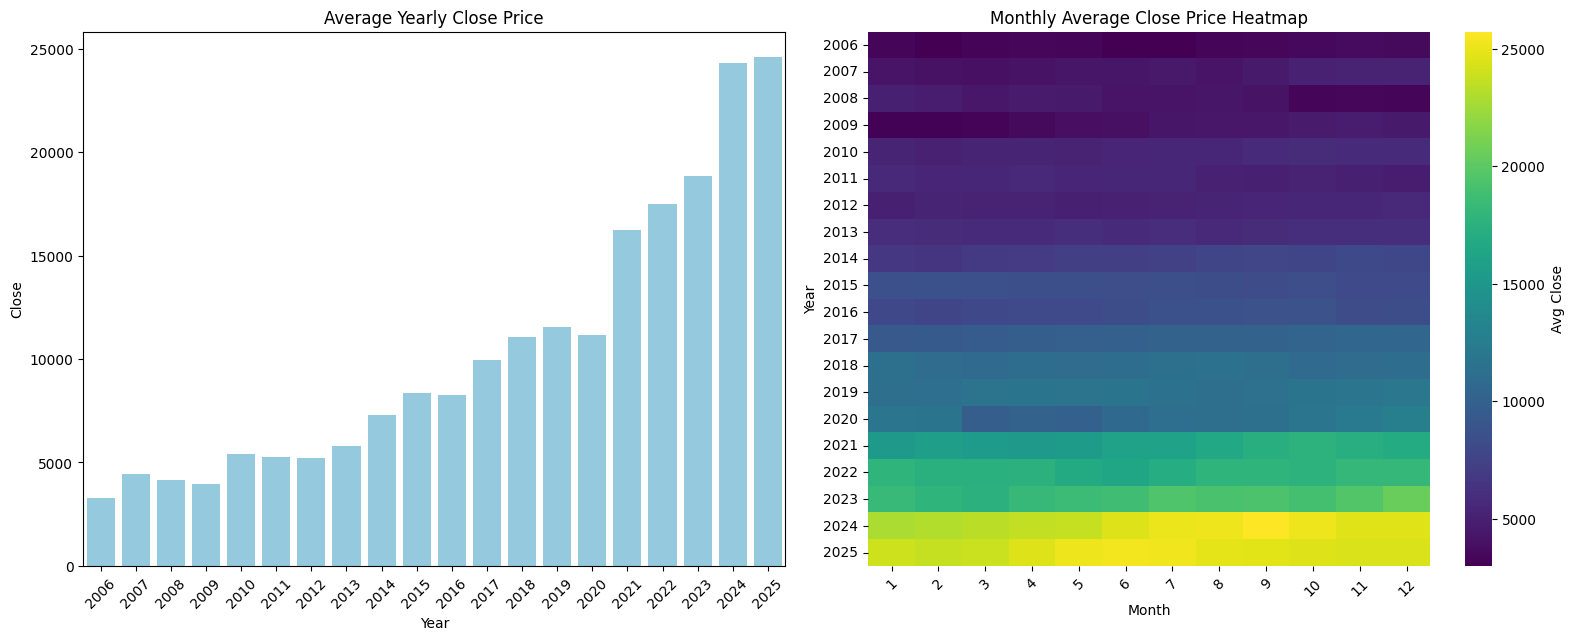

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure Month column exists
df['Month'] = df['Date'].dt.month

# --- KPI: Average Yearly Volatility (High-Low Range) ---
df['Daily_Range'] = df['High'] - df['Low']
avg_yearly_range = df.groupby('Year')['Daily_Range'].mean().reset_index()
print("\nAverage Yearly High-Low Range (Volatility):")
print(avg_yearly_range.set_index('Year')['Daily_Range'])

# --- Data Prep ---
yearly_avg_close = df.groupby('Year')['Close'].mean().reset_index()
yearly_returns_df = yearly_returns.reset_index()
yearly_returns_df.columns = ['Year', 'Returns']
monthly_avg_close = df.groupby(['Year', 'Month'])['Close'].mean().reset_index()

# --- Dashboard 2 ---
plt.figure(figsize=(16,12))

# Subplot 1: Average Yearly Close Price
plt.subplot(2,2,1)
sns.barplot(data=yearly_avg_close, x='Year', y='Close', color='skyblue')
plt.title('Average Yearly Close Price')
plt.xticks(rotation=45)

# Subplot 2: Yearly Returns %
plt.subplot(2,2,2)
colors = ['green' if val > 0 else 'red' for val in yearly_returns_df['Returns']]
plt.bar(yearly_returns_df['Year'], yearly_returns_df['Returns']*100, color=colors)
plt.title('Yearly Returns %')
plt.ylabel('Return %')
plt.xticks(rotation=45)

# Subplot 3: Monthly Average Close Price Heatmap
pivot_data = monthly_avg_close.pivot(index='Year', columns='Month', values='Close')
sns.heatmap(pivot_data, cmap='viridis', annot=False, cbar_kws={'label': 'Avg Close'})
plt.title('Monthly Average Close Price Heatmap')
plt.xlabel('Month')
plt.ylabel('Year')

plt.tight_layout()
plt.show()


**Dashboard 3: Risk & Performance Analysis**

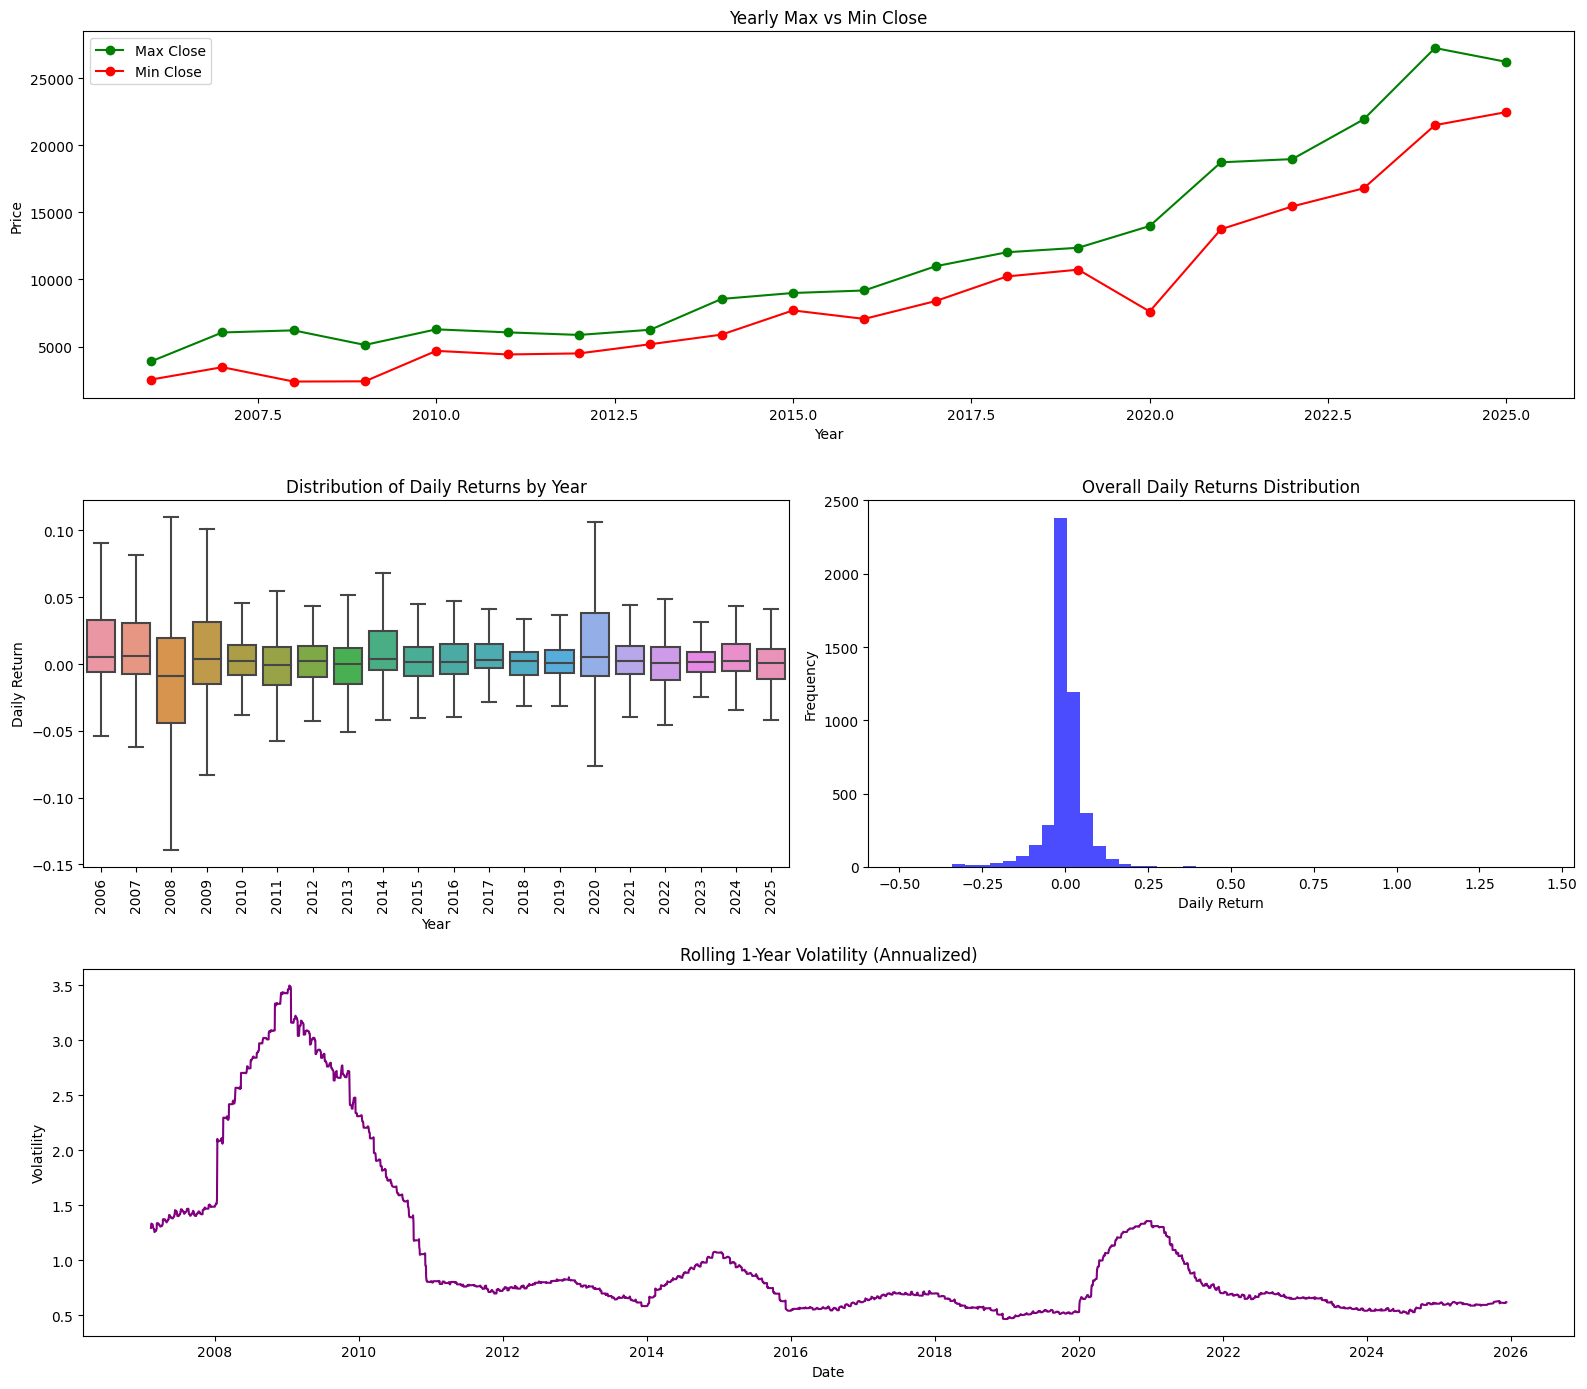

In [0]:
import numpy as np

# Daily Returns
df['Daily Return'] = df['Close'].pct_change()

# --- Data Prep ---
yearly_max_min = df.groupby('Year').agg(
    Max_Close=('Close','max'),
    Min_Close=('Close','min')
).reset_index()

# Rolling 1-Year Volatility (252 trading days)
df['Rolling Volatility'] = df['Daily Return'].rolling(window=252).std() * np.sqrt(252)

# --- Dashboard 3 ---
plt.figure(figsize=(16,14))

# Subplot 1: Yearly Max vs Min Close
plt.subplot(3,1,1)
plt.plot(yearly_max_min['Year'], yearly_max_min['Max_Close'], marker='o', color='green', label='Max Close')
plt.plot(yearly_max_min['Year'], yearly_max_min['Min_Close'], marker='o', color='red', label='Min Close')
plt.title('Yearly Max vs Min Close')
plt.xlabel('Year')
plt.ylabel('Price')
plt.legend()

# Subplot 2: Boxplot of Daily Returns by Year
plt.subplot(3,2,3)
sns.boxplot(x='Year', y='Daily Return', data=df, showfliers=False)
plt.title('Distribution of Daily Returns by Year')
plt.xticks(rotation=90)

# Subplot 3: Histogram of Daily Returns
plt.subplot(3,2,4)
plt.hist(df['Daily Return'].dropna(), bins=50, color='blue', alpha=0.7)
plt.title('Overall Daily Returns Distribution')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')

# Subplot 4: Rolling Volatility Line Chart
plt.subplot(3,1,3)
plt.plot(df['Date'], df['Rolling Volatility'], color='purple')
plt.title('Rolling 1-Year Volatility (Annualized)')
plt.xlabel('Date')
plt.ylabel('Volatility')

plt.tight_layout()
plt.show()


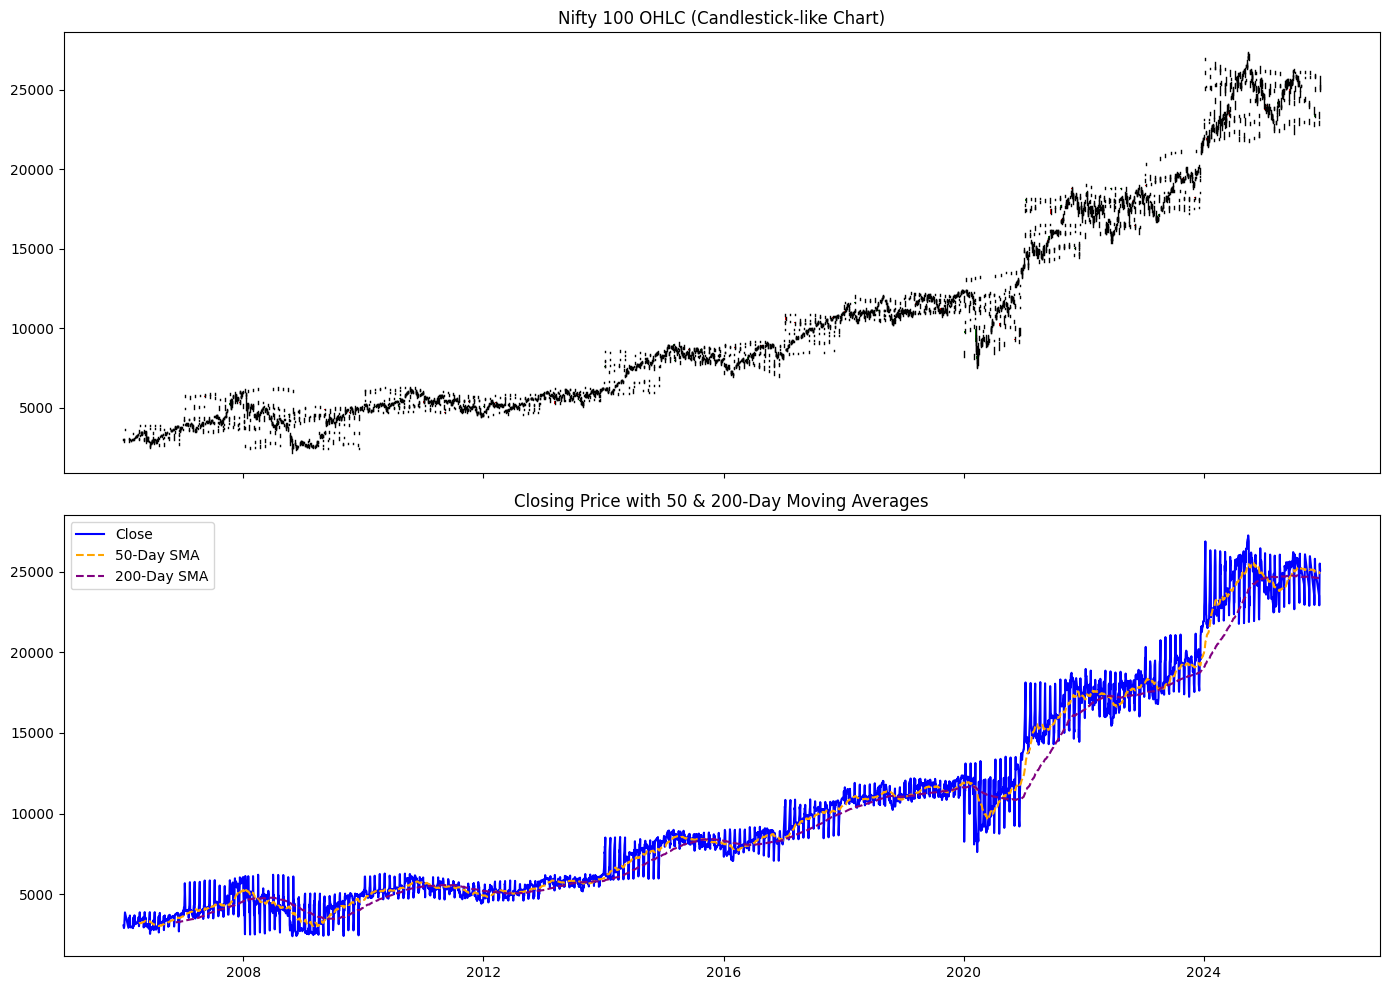

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Ensure Date is datetime
df['Date'] = pd.to_datetime(df['Date'])

# Daily Return
df['Daily Return'] = df['Close'].pct_change()

# Moving Averages
df['SMA_50'] = df['Close'].rolling(50).mean()
df['SMA_200'] = df['Close'].rolling(200).mean()

# --- Dashboard 1 ---
fig, axes = plt.subplots(2, 1, figsize=(14, 10), sharex=True)

# 1️⃣ "Candlestick-like" Chart (Open-High-Low-Close)
# We can approximate candlesticks with bar + line
width = 0.6
color_up = 'green'
color_down = 'red'

for i in range(len(df)):
    # Wick (High-Low)
    axes[0].plot([df['Date'].iloc[i], df['Date'].iloc[i]], 
                 [df['Low'].iloc[i], df['High'].iloc[i]], 
                 color='black', linewidth=1)

    # Body (Open-Close)
    if df['Close'].iloc[i] >= df['Open'].iloc[i]:
        axes[0].bar(df['Date'].iloc[i], 
                    df['Close'].iloc[i] - df['Open'].iloc[i], 
                    width, bottom=df['Open'].iloc[i], color=color_up)
    else:
        axes[0].bar(df['Date'].iloc[i], 
                    df['Close'].iloc[i] - df['Open'].iloc[i], 
                    width, bottom=df['Open'].iloc[i], color=color_down)

axes[0].set_title("Nifty 100 OHLC (Candlestick-like Chart)")

# 2️⃣ Closing Price with Moving Averages
axes[1].plot(df['Date'], df['Close'], label="Close", color="blue")
axes[1].plot(df['Date'], df['SMA_50'], label="50-Day SMA", color="orange", linestyle="--")
axes[1].plot(df['Date'], df['SMA_200'], label="200-Day SMA", color="purple", linestyle="--")
axes[1].set_title("Closing Price with 50 & 200-Day Moving Averages")
axes[1].legend()

plt.tight_layout()
plt.show()


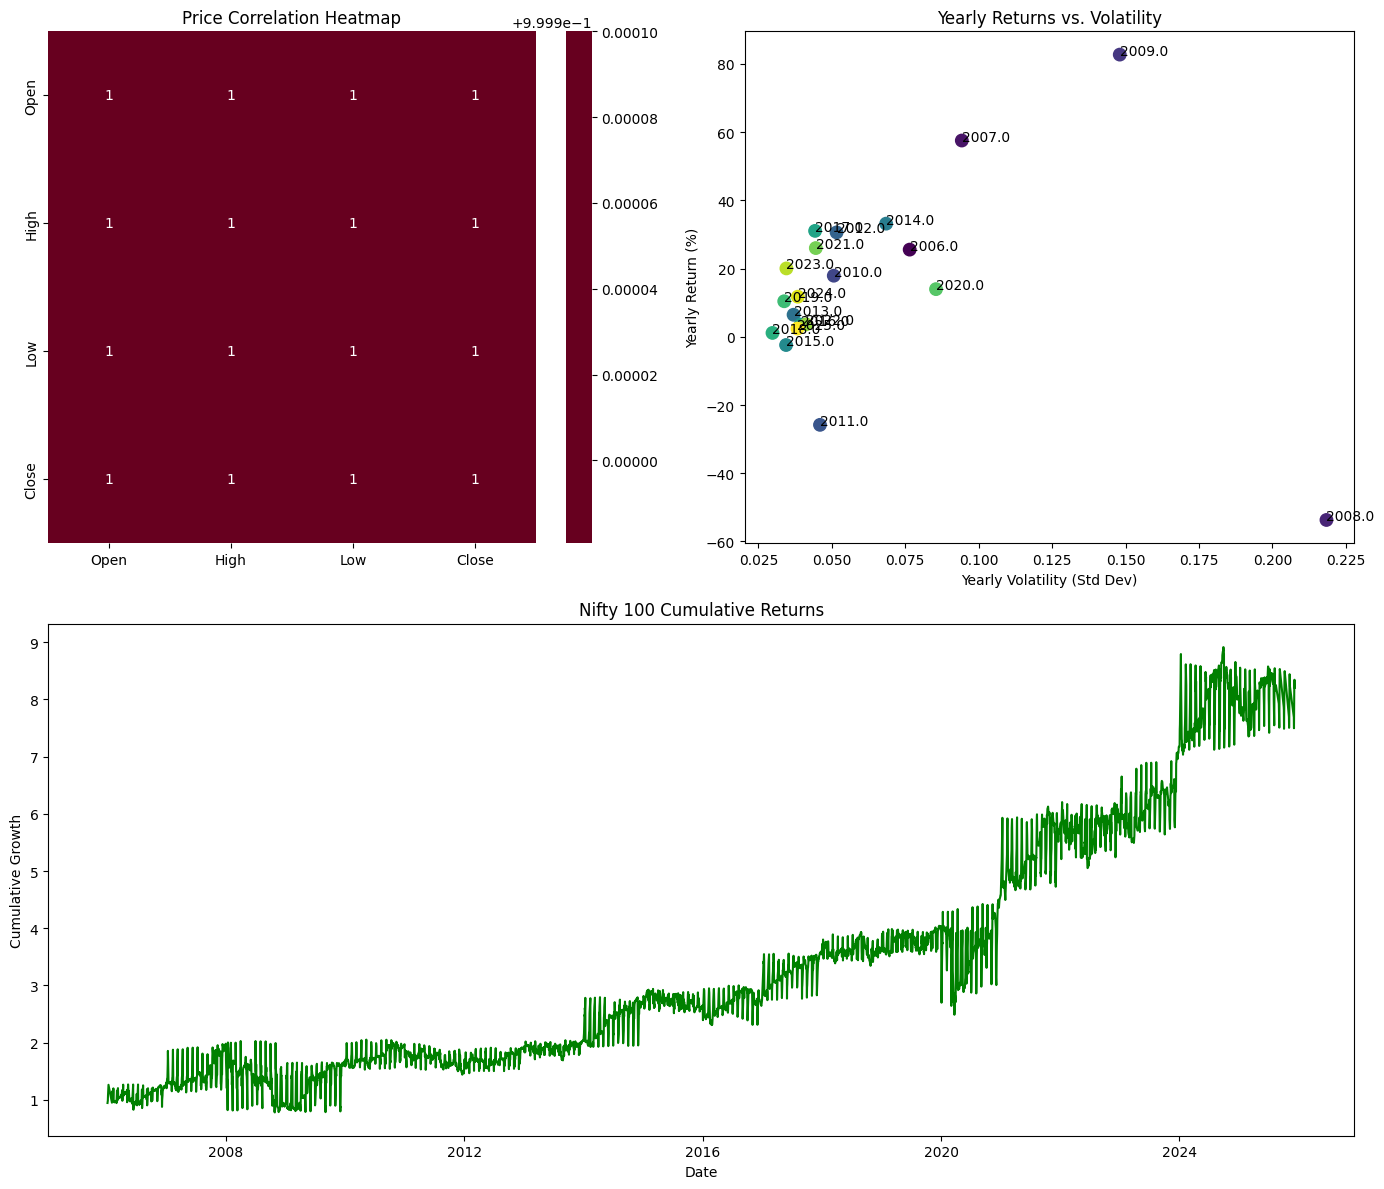

In [0]:
# --- Correlation Heatmap ---
plt.figure(figsize=(14,12))

# Subplot 1: Correlation Heatmap
plt.subplot(2,2,1)
corr = df[['Open','High','Low','Close']].corr()
sns.heatmap(corr, annot=True, cmap="RdBu_r", center=0)
plt.title("Price Correlation Heatmap")

# Subplot 2: Yearly Returns vs Volatility
yearly_summary = df.groupby('Year').agg(
    Yearly_Return=('Daily Return', lambda x: (1+x).prod() - 1),
    Volatility=('Daily Return','std')
).reset_index()

plt.subplot(2,2,2)
plt.scatter(yearly_summary['Volatility'], yearly_summary['Yearly_Return']*100, c=yearly_summary['Year'], cmap='viridis', s=80)
for i,row in yearly_summary.iterrows():
    plt.text(row['Volatility'], row['Yearly_Return']*100, str(row['Year']))
plt.xlabel("Yearly Volatility (Std Dev)")
plt.ylabel("Yearly Return (%)")
plt.title("Yearly Returns vs. Volatility")

# Subplot 3: Cumulative Returns
df['Cumulative Returns'] = (1 + df['Daily Return']).cumprod()
plt.subplot(2,1,2)
plt.plot(df['Date'], df['Cumulative Returns'], color="green")
plt.title("Nifty 100 Cumulative Returns")
plt.xlabel("Date")
plt.ylabel("Cumulative Growth")

plt.tight_layout()
plt.show()
